We adopted a roving oddball paradigm. The trains of repetitive tones of different frequencies were randomly presented. Epidural ECoG recordings were taken in the passive listening condition while monkeys were awake.
ECoG data were sampled at 1KHz.


Komatsu, M., Takaura, K., & Fujii, N. (2015). "Mismatch negativity in common marmosets: Whole-cortical recordings with multi-channel electrocorticograms." Scientific Reports, 5, 15006.

Canales-Johnson, A., Borges, A. F. T., Komatsu, M., Fujii, N., Fahrenfort, J. J., Miller, K. J., & Noreika, V. (2021). Broadband Dynamics Rather than Frequency-Specific Rhythms Underlie Prediction Error in the Primate Auditory Cortex. Journal of Neuroscience, 41(45), 9374-9391.

In [123]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colormaps
from mne_bids import BIDSPath, read_raw_bids

import os
import re

import mne
from mne.viz import plot_alignment, snapshot_brain_montage

from scipy.io import loadmat

from neurodsp.spectral import compute_spectrum
from neurodsp.filt import filter_signal

from fooof import FOOOF, FOOOFGroup

In [182]:
#subfolder = "./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/"
subfolder = "./20151008S2_Auditory+Oddball_Go_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/"
fs = 1000

# load data

In [183]:
# Function to extract channel name from filename
def extract_channel_name(filename):
    # Assuming the channel name is between 'ch' and '.mat'
    start_index = filename.find('ch') + 2
    end_index = filename.find('.mat')
    return filename[start_index:end_index]

# Function to apply common median reference to the data
def apply_common_median_reference(raw):
    picks = mne.pick_types(raw.info, eeg=True, exclude='bads')
    raw.set_eeg_reference(ref_channels='average', projection=True)

In [184]:
# Folder containing data files
data_folder = './20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap'
subfolder = './20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap'

# List all .mat files in the folder
mat_files = [file for file in os.listdir(data_folder) if file.endswith('.mat')]

In [185]:

# Loop through data files and apply common median reference
for mat_file in mat_files:
    file_path = os.path.join(data_folder, mat_file)
    
    # Load ECoG data from .mat file
    print(file_path)
    match = re.search(r'(\d+).mat', file_path)
    if match:
        match = match[0].split(".mat")[0]
    else:
        break

    ecog_data = loadmat(file_path)["ECoGData_ch" + match]

    # Extract channel name from filename
    channel_name = extract_channel_name(mat_file)

    # Create MNE Raw object
    info = mne.create_info(ch_names=[channel_name], sfreq=fs, ch_types='ecog')
    raw = mne.io.RawArray(ecog_data, info)

    # Apply common median reference
    apply_common_median_reference(raw)
    
    #raw.apply_proj()

    #raw.set_eeg_reference(ref_channels='average', projection=True)
    
    
    # Save the preprocessed data
    #output_path = os.path.join(data_folder, f'rereferenced_{mat_file}')
    output_path = os.path.join(data_folder, f'rereferenced_abc.fif')
    raw.save(output_path, overwrite=True)

./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch52.mat
Creating RawArray with float64 data, n_channels=1, n_times=911901
    Range : 0 ... 911900 =      0.000 ...   911.900 secs
Ready.
ECoG channel type selected for re-referencing
Adding average ECOG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Overwriting existing file.
Writing /Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif
Closing /Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif
[done]
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch2.mat
Creating RawArray with float64 data, n_channels=1, n_times=91

/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/95708997.py:33: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_path, overwrite=True)
/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/95708997.py:33: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss

Closing /Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif
[done]
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch53.mat
Creating RawArray with float64 data, n_channels=1, n_times=911901
    Range : 0 ... 911900 =      0.000 ...   911.900 secs
Ready.
ECoG channel type selected for re-referencing
Adding average ECOG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Overwriting existing file.
Writing /Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif
Closing /Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferen

/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/95708997.py:33: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_path, overwrite=True)
/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/95708997.py:33: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss

Creating RawArray with float64 data, n_channels=1, n_times=911901
    Range : 0 ... 911900 =      0.000 ...   911.900 secs
Ready.
ECoG channel type selected for re-referencing
Adding average ECOG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Overwriting existing file.
Writing /Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif
Closing /Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif
[done]
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch44.mat
Creating RawArray with float64 data, n_channels=1, n_times=911901
    Range : 0 ... 911900 =      0.000 ...   911.900 secs
Ready.
ECoG channel type selected for 

/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/95708997.py:33: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_path, overwrite=True)
/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/95708997.py:33: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss

Creating RawArray with float64 data, n_channels=1, n_times=911901
    Range : 0 ... 911900 =      0.000 ...   911.900 secs
Ready.
ECoG channel type selected for re-referencing
Adding average ECOG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Overwriting existing file.
Writing /Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif
Closing /Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif
[done]
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch40.mat
Creating RawArray with float64 data, n_channels=1, n_times=911901
    Range : 0 ... 911900 =      0.000 ...   911.900 secs
Ready.
ECoG channel type selected for 

/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/95708997.py:33: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_path, overwrite=True)
/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/95708997.py:33: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss

Creating RawArray with float64 data, n_channels=1, n_times=911901
    Range : 0 ... 911900 =      0.000 ...   911.900 secs
Ready.
ECoG channel type selected for re-referencing
Adding average ECOG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Overwriting existing file.
Writing /Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif
Closing /Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif
[done]
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch41.mat
Creating RawArray with float64 data, n_channels=1, n_times=911901
    Range : 0 ... 911900 =      0.000 ...   911.900 secs
Ready.
ECoG channel type selected for 

/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/95708997.py:33: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_path, overwrite=True)
/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/95708997.py:33: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss

Closing /Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif
[done]
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch43.mat
Creating RawArray with float64 data, n_channels=1, n_times=911901
    Range : 0 ... 911900 =      0.000 ...   911.900 secs
Ready.
ECoG channel type selected for re-referencing
Adding average ECOG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Overwriting existing file.
Writing /Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif
Closing /Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferen

/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/95708997.py:33: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_path, overwrite=True)
/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/95708997.py:33: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss

Creating RawArray with float64 data, n_channels=1, n_times=911901
    Range : 0 ... 911900 =      0.000 ...   911.900 secs
Ready.
ECoG channel type selected for re-referencing
Adding average ECOG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Overwriting existing file.
Writing /Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif
Closing /Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif
[done]
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch56.mat
Creating RawArray with float64 data, n_channels=1, n_times=911901
    Range : 0 ... 911900 =      0.000 ...   911.900 secs
Ready.
ECoG channel type selected for 

/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/95708997.py:33: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_path, overwrite=True)
/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/95708997.py:33: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss

Closing /Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif
[done]
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch25.mat
Creating RawArray with float64 data, n_channels=1, n_times=911901
    Range : 0 ... 911900 =      0.000 ...   911.900 secs
Ready.
ECoG channel type selected for re-referencing
Adding average ECOG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Overwriting existing file.
Writing /Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif
Closing /Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferen

/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/95708997.py:33: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_path, overwrite=True)
/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/95708997.py:33: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss

Creating RawArray with float64 data, n_channels=1, n_times=911901
    Range : 0 ... 911900 =      0.000 ...   911.900 secs
Ready.
ECoG channel type selected for re-referencing
Adding average ECOG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Overwriting existing file.
Writing /Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif
Closing /Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif
[done]
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch30.mat
Creating RawArray with float64 data, n_channels=1, n_times=911901
    Range : 0 ... 911900 =      0.000 ...   911.900 secs
Ready.
ECoG channel type selected for 

/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/95708997.py:33: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_path, overwrite=True)
/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/95708997.py:33: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss

Closing /Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif
[done]
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch32.mat
Creating RawArray with float64 data, n_channels=1, n_times=911901
    Range : 0 ... 911900 =      0.000 ...   911.900 secs
Ready.
ECoG channel type selected for re-referencing
Adding average ECOG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Overwriting existing file.
Writing /Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif
Closing /Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferen

/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/95708997.py:33: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_path, overwrite=True)
/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/95708997.py:33: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss

Closing /Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif
[done]
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch33.mat
Creating RawArray with float64 data, n_channels=1, n_times=911901
    Range : 0 ... 911900 =      0.000 ...   911.900 secs
Ready.
ECoG channel type selected for re-referencing
Adding average ECOG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Overwriting existing file.
Writing /Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif
Closing /Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferen

/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/95708997.py:33: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_path, overwrite=True)
/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/95708997.py:33: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss

Creating RawArray with float64 data, n_channels=1, n_times=911901
    Range : 0 ... 911900 =      0.000 ...   911.900 secs
Ready.
ECoG channel type selected for re-referencing
Adding average ECOG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Overwriting existing file.
Writing /Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif


/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/95708997.py:33: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_path, overwrite=True)


Closing /Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif
[done]
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch22.mat
Creating RawArray with float64 data, n_channels=1, n_times=911901
    Range : 0 ... 911900 =      0.000 ...   911.900 secs
Ready.
ECoG channel type selected for re-referencing
Adding average ECOG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Overwriting existing file.
Writing /Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif
Closing /Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferen

/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/95708997.py:33: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_path, overwrite=True)
/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/95708997.py:33: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss

Closing /Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif
[done]
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch34.mat
Creating RawArray with float64 data, n_channels=1, n_times=911901
    Range : 0 ... 911900 =      0.000 ...   911.900 secs
Ready.
ECoG channel type selected for re-referencing
Adding average ECOG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Overwriting existing file.
Writing /Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif
Closing /Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferen

/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/95708997.py:33: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_path, overwrite=True)
/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/95708997.py:33: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss

Closing /Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif
[done]
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch10.mat
Creating RawArray with float64 data, n_channels=1, n_times=911901
    Range : 0 ... 911900 =      0.000 ...   911.900 secs
Ready.
ECoG channel type selected for re-referencing
Adding average ECOG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Overwriting existing file.
Writing /Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif
Closing /Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferen

/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/95708997.py:33: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_path, overwrite=True)
/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/95708997.py:33: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss

Closing /Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif
[done]
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch11.mat
Creating RawArray with float64 data, n_channels=1, n_times=911901
    Range : 0 ... 911900 =      0.000 ...   911.900 secs
Ready.
ECoG channel type selected for re-referencing
Adding average ECOG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Overwriting existing file.
Writing /Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif
Closing /Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferen

/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/95708997.py:33: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_path, overwrite=True)
/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/95708997.py:33: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss

Creating RawArray with float64 data, n_channels=1, n_times=911901
    Range : 0 ... 911900 =      0.000 ...   911.900 secs
Ready.
ECoG channel type selected for re-referencing
Adding average ECOG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Overwriting existing file.
Writing /Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif
Closing /Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif
[done]
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch17.mat
Creating RawArray with float64 data, n_channels=1, n_times=911901
    Range : 0 ... 911900 =      0.000 ...   911.900 secs
Ready.
ECoG channel type selected for 

/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/95708997.py:33: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_path, overwrite=True)
/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/95708997.py:33: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss

Closing /Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif
[done]
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch15.mat
Creating RawArray with float64 data, n_channels=1, n_times=911901
    Range : 0 ... 911900 =      0.000 ...   911.900 secs
Ready.
ECoG channel type selected for re-referencing
Adding average ECOG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Overwriting existing file.
Writing /Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif
Closing /Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferen

/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/95708997.py:33: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_path, overwrite=True)
/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/95708997.py:33: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss

Creating RawArray with float64 data, n_channels=1, n_times=911901
    Range : 0 ... 911900 =      0.000 ...   911.900 secs
Ready.
ECoG channel type selected for re-referencing
Adding average ECOG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Overwriting existing file.
Writing /Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif
Closing /Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif
[done]
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch58.mat
Creating RawArray with float64 data, n_channels=1, n_times=911901
    Range : 0 ... 911900 =      0.000 ...   911.900 secs
Ready.
ECoG channel type selected for 

/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/95708997.py:33: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_path, overwrite=True)
/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/95708997.py:33: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss

Creating RawArray with float64 data, n_channels=1, n_times=911901
    Range : 0 ... 911900 =      0.000 ...   911.900 secs
Ready.
ECoG channel type selected for re-referencing
Adding average ECOG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Overwriting existing file.
Writing /Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif
Closing /Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif
[done]
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch59.mat
Creating RawArray with float64 data, n_channels=1, n_times=911901
    Range : 0 ... 911900 =      0.000 ...   911.900 secs
Ready.
ECoG channel type selected for 

/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/95708997.py:33: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_path, overwrite=True)
/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/95708997.py:33: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss

Closing /Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif
[done]
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch61.mat
Creating RawArray with float64 data, n_channels=1, n_times=911901
    Range : 0 ... 911900 =      0.000 ...   911.900 secs
Ready.
ECoG channel type selected for re-referencing
Adding average ECOG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Overwriting existing file.
Writing /Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif
Closing /Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferen

/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/95708997.py:33: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_path, overwrite=True)
/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/95708997.py:33: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss

Closing /Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif
[done]
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch62.mat
Creating RawArray with float64 data, n_channels=1, n_times=911901
    Range : 0 ... 911900 =      0.000 ...   911.900 secs
Ready.
ECoG channel type selected for re-referencing
Adding average ECOG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Overwriting existing file.
Writing /Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif
Closing /Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferen

/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/95708997.py:33: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_path, overwrite=True)
/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/95708997.py:33: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss

Opening raw data file ./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average ECOG reference (1 x 1)  idle
    Range : 0 ... 911900 =      0.000 ...   911.900 secs
Ready.
demo,  888916
data shape:  (911901,)
matplt shape:  (911901,)


/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/2241878819.py:1: RuntimeWarning: This filename (./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data = mne.io.read_raw_fif(subfolder + "/rereferenced_abc.fif").get_data()[0]


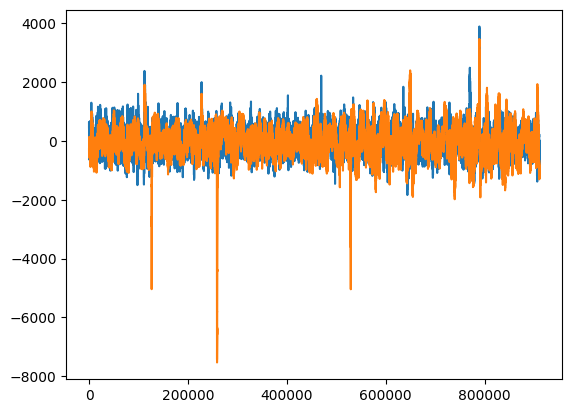

In [195]:
data = mne.io.read_raw_fif(subfolder + "/rereferenced_abc.fif").get_data()[0]


#data = filter_signal(data, fs, "bandpass",f_range=(.1, ))
#data = filter_signal(data, fs, "highpass",f_range=2)

repEvent = loadmat("./repEvent.mat")

train_onset = repEvent["repEvent"][:,5]
print("demo, ", train_onset[-1])


"""
"""
print("data shape: ", data.shape)

matplt = loadmat(subfolder + "/ECoG_ch2.mat")["ECoGData_ch2"]
print("matplt shape: ",matplt[0].shape)

plt.plot(data)
plt.plot(matplt[0])
plt.show()

#data = matplt[0]

"""
"""


arr_before = []
arr_after = []

jump = 5000

for index, onset in enumerate(train_onset):
    freqs, powers_bef = compute_spectrum(data[onset-jump:onset], fs)
    freqs, powers_aft = compute_spectrum(data[onset:onset+jump], fs)
    
    np.array(arr_after.append(np.abs(powers_aft)))
    np.array(arr_before.append(np.abs(powers_bef)))
    

#print(np.mean(arr_after, axis=0) == np.mean(arr_before, axis=0))


fm_before = FOOOFGroup()
fm_after = FOOOFGroup()


FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Running FOOOFGroup across 1 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 1.00
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.



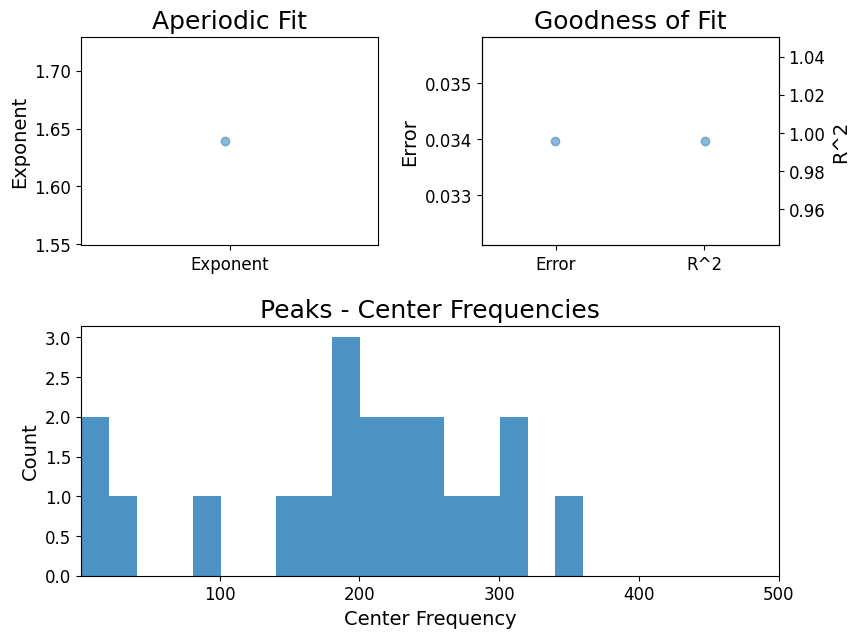

In [196]:
fm_before.fit(
    np.array(freqs), 
    np.array([np.mean(arr_before, axis=0)])
    #np.array(arr_before)
)
fm_before.plot()


FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Running FOOOFGroup across 1 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 1.00
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.



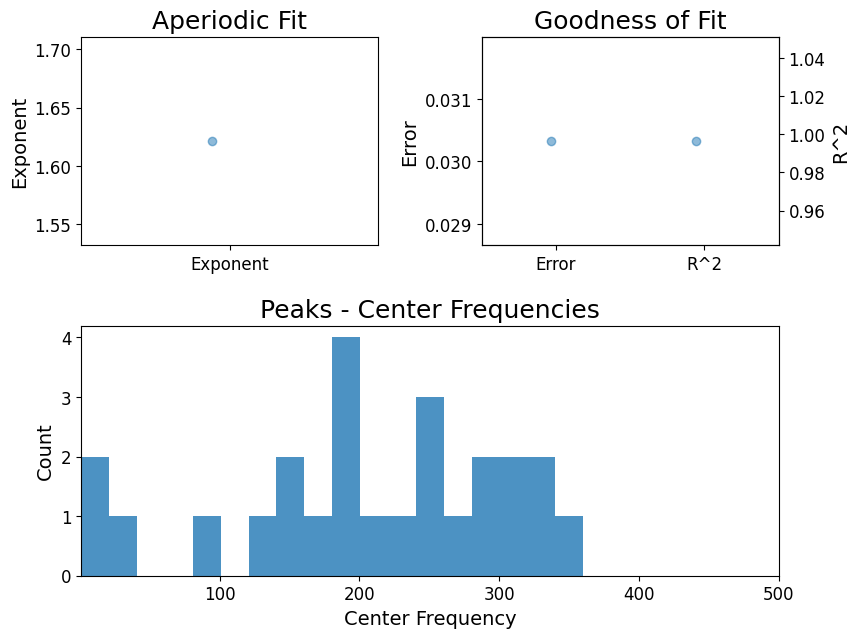

In [197]:
fm_after.fit(
    np.array(freqs), 
    np.array([np.mean(arr_after, axis=0)])
    #np.array(arr_after)
)
fm_after.plot()

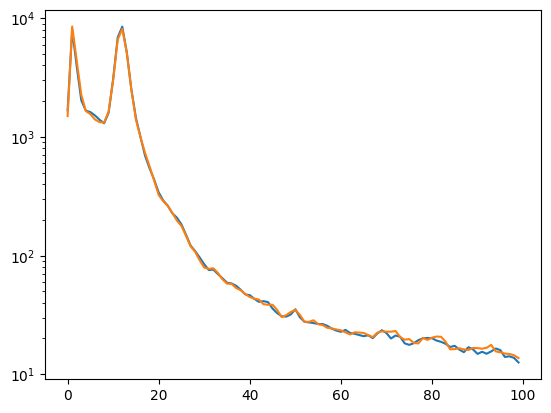

In [198]:
plt.semilogy(freqs[:100], (np.mean(arr_before, axis=0)[:100]))
plt.semilogy(freqs[:100], (np.mean(arr_after, axis=0)[:100]))

plt.show()

---

In [204]:
data = mne.io.read_raw_fif(subfolder + "/rereferenced_abc.fif").get_data()[0]


#data = filter_signal(data, fs, "bandpass",f_range=(.1, ))
#data = filter_signal(data, fs, "highpass",f_range=2)

repEvent = loadmat("./repEvent.mat")

train_onset = repEvent["repEvent"][:,5]

ch_bef = []
ch_aft = []

for i in range(64):
    if i != 44 and i != 45:
        data = loadmat(subfolder + f"/ECoG_ch{i + 1}.mat")[f"ECoGData_ch{i + 1}"][0]

        arr_before = []
        arr_after = []

        jump = 5000

        for index, onset in enumerate(train_onset):
            freqs, powers_bef = compute_spectrum(data[onset-jump:onset], fs)
            #freqs, powers_aft = compute_spectrum(data[onset:onset+jump], fs)
            freqs, powers_aft = compute_spectrum(data[onset:onset+jump], fs)
            
            np.array(arr_after.append(powers_aft))
            np.array(arr_before.append(powers_bef))
            
        np.array(ch_bef.append(np.mean(arr_before, axis = 0)))
        np.array(ch_aft.append(np.mean(arr_after, axis = 0)))


#fm_before = FOOOFGroup(min_peak_height=1)
#fm_after = FOOOFGroup(min_peak_height=1)
fm_before = FOOOFGroup()
fm_after = FOOOFGroup()

Opening raw data file ./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average ECOG reference (1 x 1)  idle
    Range : 0 ... 911900 =      0.000 ...   911.900 secs
Ready.


/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/3641673843.py:1: RuntimeWarning: This filename (./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data = mne.io.read_raw_fif(subfolder + "/rereferenced_abc.fif").get_data()[0]


[[1.2258943e+03 5.8341011e+03 2.8273735e+03 ... 8.6801410e-02
  8.7819025e-02 4.1712567e-02]
 [7.7823621e+02 1.2869628e+04 4.1248887e+03 ... 7.8356154e-02
  7.7865951e-02 4.0390328e-02]
 [5.2082074e+02 3.9401062e+03 1.1157999e+03 ... 1.0318447e-01
  9.7676210e-02 4.8277296e-02]
 ...
 [1.4450789e+03 6.7526851e+03 3.4176389e+03 ... 6.2122387e-01
  6.4230770e-01 3.1782803e-01]
 [1.6725282e+03 8.0050527e+03 3.9234387e+03 ... 7.0027167e-01
  6.9002742e-01 3.2942662e-01]
 [1.3849476e+03 6.4362515e+03 3.3514922e+03 ... 6.3990980e-01
  6.3744646e-01 3.0764619e-01]]

FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Running FOOOFGroup across 62 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 1.00
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of appr

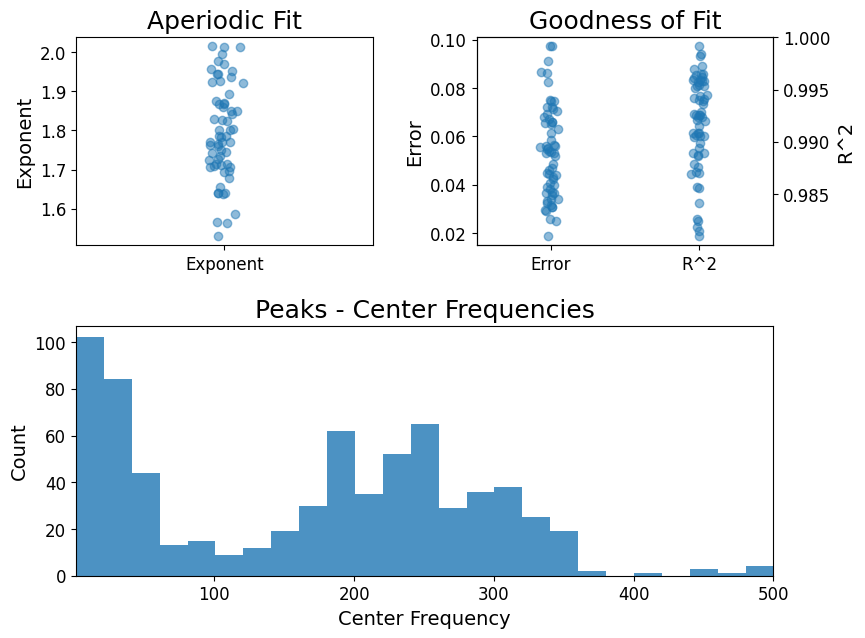

In [205]:
print(np.array(ch_bef))
fm_before.fit(
    np.array(freqs), 
    np.array(ch_bef)
)
fm_before.plot()


FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Running FOOOFGroup across 62 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 1.00
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.



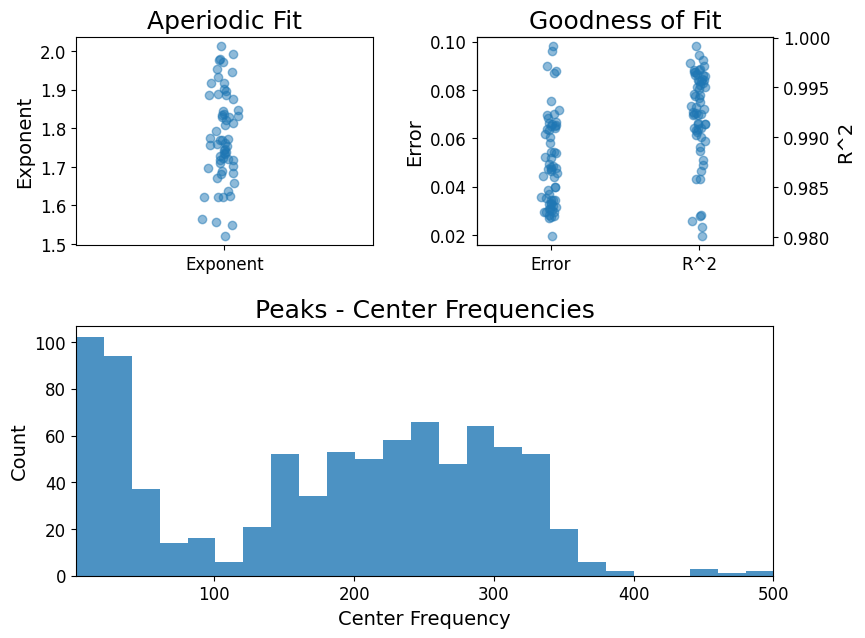

In [206]:
fm_after.fit(
    np.array(freqs), 
    np.array(ch_aft)
)
fm_after.plot()

In [207]:
exps_bef = fm_before.get_params('aperiodic_params', 'exponent')
exps_aft = fm_after.get_params('aperiodic_params', 'exponent')

Shown difference 1/F per electrode

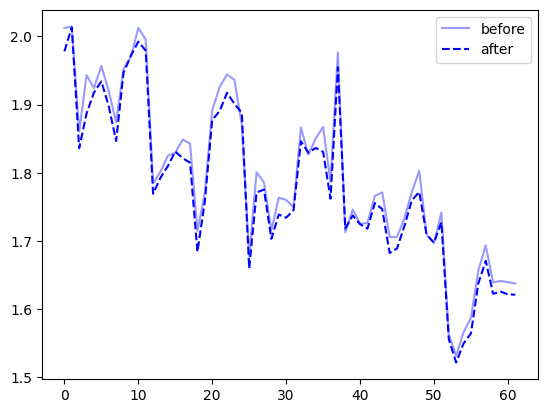

In [209]:
plt.plot(exps_bef, color="blue", alpha=.4, label="before")
plt.plot(exps_aft, '--', color="blue", label="after")
plt.legend()
plt.show()

# Sweeping window method

In [214]:
data = mne.io.read_raw_fif(subfolder + "/rereferenced_abc.fif").get_data()[0]


#data = filter_signal(data, fs, "bandpass",f_range=(.1, ))
#data = filter_signal(data, fs, "highpass",f_range=2)

repEvent = loadmat("./repEvent.mat")

train_onset = repEvent["repEvent"][:,5]

ch_bef = []
ch_aft = []
ch_between = []

for i in range(64):
    if i != 44 and i != 45:

        arr_before = []
        arr_after = []
        arr_between = []

        jump = 5000

        for index, onset in enumerate(train_onset):
            freqs, powers_bef = compute_spectrum(data[onset-jump:onset], fs)
            freqs, powers_switch = compute_spectrum(data[(onset-int(jump/2)):(onset+int(jump/2))], fs)
            freqs, powers_aft = compute_spectrum(data[onset:onset+jump], fs)
            
            np.array(arr_after.append(powers_aft))
            np.array(arr_before.append(powers_bef))
            np.array(arr_between.append(powers_switch))
            
        np.array(ch_bef.append(np.mean(arr_before, axis = 0)))
        np.array(ch_aft.append(np.mean(arr_after, axis = 0)))
        np.array(ch_between.append(np.mean(arr_between, axis = 0)))



fm_before = FOOOFGroup()
fm_after = FOOOFGroup()

Opening raw data file ./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average ECOG reference (1 x 1)  idle
    Range : 0 ... 911900 =      0.000 ...   911.900 secs
Ready.


/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/322258475.py:1: RuntimeWarning: This filename (./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data = mne.io.read_raw_fif(subfolder + "/rereferenced_abc.fif").get_data()[0]


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (240,) + inhomogeneous part.

In [ ]:
fm_before.fit(
    np.array(freqs), 
    np.array(ch_between)
)
fm_before.plot()